# Python for Data Science Project Session 3: Social Sciences

The combination of social sciences and maths is not really any social sciences kid's fave combo (perhaps besides the econ kids) ... which is why NumPy is a useful tool to help simplfy our lives!  

We will cover two sub-projects in this workbook.  Firstly, we will look at happiness data, practicing techniques to manage and alter arrays.  Secondly, we will look at population growth modelling for India, making use of NumPy's mathematical operations to extrapolate the data.  We will then plot these extrapolation outcomes - a nice little refresher on Session 2 data visualisation.

Start by importing the following packages:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Section 1: Happiness data

Import the data file `Happiness_survey_2019.csv` and name the dataset `happy_df`.

In [4]:
happy_df = pd.read_csv('Happiness_survey_2019.csv')
happy_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


We will now get the dataframe ready to convert into an array.  We will be analysing the data on a global scale and doing our own data analysis, so will hence  drop the `Overall rank` column.  What other column do you also need to drop in order for the array to be viable?  Do this below.

Hint: look at datatypes

In [5]:
happy_df = happy_df.drop(['Overall rank', 'Country or region'], axis=1).copy()
happy_df

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


Now that the dataframe is ready, convert it into an array.  Name this array `happy`.

In [6]:
happy = happy_df.to_numpy()
happy

array([[7.769, 1.34 , 1.587, ..., 0.596, 0.153, 0.393],
       [7.6  , 1.383, 1.573, ..., 0.592, 0.252, 0.41 ],
       [7.554, 1.488, 1.582, ..., 0.603, 0.271, 0.341],
       ...,
       [3.203, 0.35 , 0.517, ..., 0.   , 0.158, 0.025],
       [3.083, 0.026, 0.   , ..., 0.225, 0.235, 0.035],
       [2.853, 0.306, 0.575, ..., 0.01 , 0.202, 0.091]])

When analysing data, it is important to get a general understanding of the distribution of the variables in question. Calculate the mean of each variable.

In [7]:
np.mean(happy, axis = 0)

array([5.40709615, 0.90514744, 1.2088141 , 0.72524359, 0.39257051,
       0.18484615, 0.11060256])

The data was already ordered from the highest to lowest happiness score, the former being 7.769, the latter being 2.853.  Therefore, a mean happiness score of 5.407 seems to indicate the data is upwardly skewed.  

A reason for this may be the divide between developping and developped nations.  In order to investigate this further, we will use a second data set called `Country_income_category.csv`.  Upload this and call it `income_df`.

In [9]:
income_df = pd.read_csv('Country_income_category.csv')
income_df

,Country or region,IncomeGroup
0,Finland,3
1,Denmark,3
2,Norway,3
3,Iceland,3
4,Netherlands,3
...,...,...
151,Rwanda,0
152,Tanzania,1
153,Afghanistan,0
154,Central African Republic,0


The countries in this data set have already been ordered to match the countries of the happiness survey.  The key is the following:

* High income country = 3
* Upper middle income country = 2
* Lower middle income country = 1
* Low income country = 0

First, do the necessary action to convert this data set into an array called `income` (don't forget about data types). 

In [10]:
income_df = income_df[["IncomeGroup"]] #drop "country or region"
income = income_df.to_numpy()

Now, combine the `income` array relating to country income categories with the array `happy`.  Name this new array `data`.

Hint: You cannot use a traditional concatenate method as the arrays have different dimensions.  Look at the documentation for `hstack` or `column_stack` below.

* hstack = https://numpy.org/doc/stable/reference/generated/numpy.hstack.html
* column stack = https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html#numpy.column_stack

In [69]:
#method 1
data = np.hstack((happy, income))
#method 2
data = np.column_stack((happy, income))
data

array([[7.769, 1.34 , 1.587, ..., 0.153, 0.393, 3.   ],
       [7.6  , 1.383, 1.573, ..., 0.252, 0.41 , 3.   ],
       [7.554, 1.488, 1.582, ..., 0.271, 0.341, 3.   ],
       ...,
       [3.203, 0.35 , 0.517, ..., 0.158, 0.025, 0.   ],
       [3.083, 0.026, 0.   , ..., 0.235, 0.035, 0.   ],
       [2.853, 0.306, 0.575, ..., 0.202, 0.091, 0.   ]])

Now, we will split the large data matrix we have into 4 subset matrices so that each one is grouped by the country income category. 

To do this, we will use the `np.split` function.  This requires distinct indices at which to split the array.  In order to do so, we will sort the `data` array by the income categorisation column so that it is in ascending order.  Then, we will identify which indices said income categorisation column changes values (from 0 to 1, 1 to 2 etc).  Using this info, we will split the array into 4 sub-matrices.  We will do this step by step below based on the following example = https://stackoverflow.com/questions/31863083/python-split-numpy-array-based-on-values-in-the-array

First, we are going to use `argsort` to sort the `data` array by the income categories (0 = low income, 1 = lower mid etc).  Sorting the income category column in acending order will mean that all the countries will be grouped by their associated categorical values (zeroes together, then ones, twos, and finally threes).  Name this array `data_sorted`, and refer to the following example for guidance = https://www.kite.com/python/answers/how-to-sort-the-rows-of-a-numpy-array-by-a-column-in-python

Hint: the income category info is in the last column of the array.

In [12]:
data_sorted = data[np.argsort(data[:, -1])]
data_sorted

array([[2.853, 0.306, 0.575, ..., 0.202, 0.091, 0.   ],
       [4.628, 0.138, 0.774, ..., 0.188, 0.102, 0.   ],
       [4.587, 0.331, 1.056, ..., 0.177, 0.113, 0.   ],
       ...,
       [6.374, 1.684, 1.313, ..., 0.22 , 0.167, 3.   ],
       [6.444, 1.159, 1.369, ..., 0.187, 0.056, 3.   ],
       [7.769, 1.34 , 1.587, ..., 0.153, 0.393, 3.   ]])

Now, using `np.diff(arr[index])` we will identify the indices at which the `data_sorted` array changes income category.

In [89]:
np.diff(data_sorted[:,-1])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

The array above has a "1" wherever the country income category changes value in the sorted array.  This therefore indicates a change from 0 to 1, or 1 to 2 etc.  

Using `np.where(index)[0]+1`, we will now identify the indices for the points at which the value changes, so that we can know where to split our array. The `[0]+1` adds 1 to it because as per how indexing works, the actual index of an item is one more than the returned index.

In [14]:
np.where(np.diff(data_sorted[:,-1]))[0]+1

array([ 23,  67, 110])

We now have all the elements we need to split our array into 4 sub-matrices using `np.array_split(arr, index)`.

Do so below, once again reffering to the example.  Call this new matrix `data_split`.

In [86]:
data_split = np.array_split(data_sorted, np.where(np.diff(data_sorted[:,-1]))[0]+1)

Now that we have our 4 distinct matrices, we can find the mean values per country income category.  Do so using a for loop.

In [87]:
for x in data_split:
    print(np.mean(x, axis=0))

[3.9956087  0.25791304 0.78182609 0.38443478 0.28430435 0.20786957
 0.10747826 0.        ]
[4.81956818 0.67922727 1.09313636 0.59631818 0.37677273 0.20915909
 0.08904545 1.        ]
[5.50532558 1.02253488 1.29832558 0.78818605 0.39469767 0.13790698
 0.07127907 2.        ]
[6.583      1.33513043 1.44928261 0.96013043 0.45982609 0.19395652
 0.16954348 3.        ]


As can be seen, there is a distinct difference between the means in each income category group.  Interestingly, the overall mean of 5.40709615 found earlier is similar to that of upper-middle income countries.  This reinforces the fact that there is a marked difference between the level of development a country has attained/their income category and their associated level of happiness.

## Section 2 : Population growth model

In this second section, we will look at India's population data and attempt to predict the population in 1991-2020 based on 1960-1990 data.  We will then compare our predictions to the real 1991-2020 data we have from our data set as a comparison.  I know maths x humanities is not the best combo, so don't worry, this will be really broken down and easy to follow.  We will use use two different methods of extrapolation:

* A standard population growth equation 
* Using NumPy to identify the pattern in number increase and continue it 

 First, load the `India_population.csv` data set and call it `pop_df`.

In [13]:
pop_df = pd.read_csv('India_population.csv')
pop_df

,2020 [YR2020],2019 [YR2019],2018 [YR2018],2017 [YR2017],2016 [YR2016],2015 [YR2015],2014 [YR2014],2013 [YR2013],2012 [YR2012],2011 [YR2011],...,1969 [YR1969],1968 [YR1968],1967 [YR1967],1966 [YR1966],1965 [YR1965],1964 [YR1964],1963 [YR1963],1962 [YR1962],1961 [YR1961],1960 [YR1960]
0,1.380004e+09,1.366418e+09,1.352642e+09,1.338677e+09,1.324517e+09,1.310152e+09,1.295601e+09,1.280842e+09,1.265780e+09,1.250288e+09,...,543084333.0,531513834.0,520400577.0,509631509.0,499123328.0,488848139.0,478825602.0,469077191.0,459642166.0,450547675.0


Notice that the datapoints in the dataset at reversed - as in the first column is 2020 and the last column in 1960 opposed to being in ascending order.  Transform `pop_df` into an array called `pop_all` and reverse it so that the years are in increasing order using `np.flip(arr)`.

In [14]:
pop_all = pop_df.to_numpy()
pop_all = np.flip(pop_all)
pop_all

array([[4.50547675e+08, 4.59642166e+08, 4.69077191e+08, 4.78825602e+08,
        4.88848139e+08, 4.99123328e+08, 5.09631509e+08, 5.20400577e+08,
        5.31513834e+08, 5.43084333e+08, 5.55189797e+08, 5.67868021e+08,
        5.81087255e+08, 5.94770136e+08, 6.08802595e+08, 6.23102900e+08,
        6.37630085e+08, 6.52408766e+08, 6.67499815e+08, 6.82995348e+08,
        6.98952837e+08, 7.15384997e+08, 7.32239498e+08, 7.49428958e+08,
        7.66833411e+08, 7.84360012e+08, 8.01975250e+08, 8.19682095e+08,
        8.37468938e+08, 8.55334675e+08, 8.73277799e+08, 8.91273202e+08,
        9.09307018e+08, 9.27403866e+08, 9.45601828e+08, 9.63922586e+08,
        9.82365248e+08, 1.00090003e+09, 1.01948359e+09, 1.03805815e+09,
        1.05657555e+09, 1.07500009e+09, 1.09331719e+09, 1.11152315e+09,
        1.12962347e+09, 1.14760992e+09, 1.16548629e+09, 1.18320947e+09,
        1.20066976e+09, 1.21772622e+09, 1.23428116e+09, 1.25028794e+09,
        1.26578024e+09, 1.28084212e+09, 1.29560077e+09, 1.310152

### Method 1: Population growth equation

The equation for population growth is the following: 

$$
P = P_0e^{λ(t_1-t_0)}
$$

The main thing to understand is that P is the population number, T refers to the year, and that λ is the growth rate - which dicates how fast the population is growing.  It is an unknown that we need to figure out from our data set.  The equation above can be rearanged into the following which will allow us to calculate λ.
$$
λ = \frac{log(\frac{P_1}{P_0})}{t_1-t_0}
$$


Create a variable called `rate` which reflects the equation above.  As we are going to be extrapolating based on values from 1960 to 1990, these will be the values we refer to for `P` and `T`.  Accordingly, let the values that refer to subscript 0 be 1960 and those with subscript 1 refer to 1990.  Use `np.log` to conduct the log in the numerator.

Hint: the index for the population in 1960 will be 0, and that for 1990 will be 31

In [27]:
rate = (np.log(pop_all[0,31]/pop_all[0,0]))/(1990-1960)
rate

0.022739570206035287

Having calculated the growth rate, we can now put together the complete equation for population growth, which we will call `pop_equation`, do extrapolate for the years 1991-2020.  Therefore, $P_0$ will be 1990, as this is the last point of the data set.

Use `np.exp` for the exponential aspect of the equation, and opposed to finding the difference between the $t_1 $ and $ t_0$ every time, multiply the `rate` variable by `n`.  

Insert this equation into the allocated place in the for loop below, which will allow the `n` variable to cycle through numbers 1-30, allowing to extrapolate 30 years of population values - 1991 to 2020!  The number range 1-30 reflects the difference [ex] 1991-1990 = 1 ; 1992-1990 = 2 ... 2020-1990 = 30.  These values will be appended to the array `pop_predict_1` - containing our first method of extrapolation.


In [33]:
pop_predict_1 = []
for n in range(30):
    pop_equation = pop_all[0,31]*np.exp(rate*n)
    pop_predict_1.append(pop_equation)
pop_predict_1

[891273202.0,
 911772561.5387955,
 932743408.0925239,
 954196585.9026766,
 976143188.6292222,
 998594565.087253,
 1021562325.1155757,
 1045058345.5802772,
 1069094776.5163763,
 1093684047.4107313,
 1118838873.6294575,
 1144572262.993173,
 1170897522.503477,
 1197828265.2241404,
 1225378417.320558,
 1253562225.2611163,
 1282394263.1841865,
 1311889440.4345636,
 1342063009.273243,
 1372930572.7645216,
 1404508092.844503,
 1436811898.575181,
 1469858694.5883658,
 1503665569.7238212,
 1538250005.8660808,
 1573629886.9845116,
 1609823508.3812978,
 1646849586.152133,
 1684727266.8645048,
 1723476137.458583]

### Method 2: NumPy extrapolation

For the second approach, we will refer to the following method to extrapolate data by letting python identify the pattern in the values and continuing it: https://stackoverflow.com/questions/19406049/extrapolating-data-with-numpy-python/19432618.

Essentially, using  the data from 1960 to 1990, python will extrapolate the years 1991-2020 based on the tendency of increase between the numbers. 

First, create an array called `pop_1990` that has data from 1960 to 1990.  To do this, you will have to use `np.delete(arr,obj)`.  

`obj` indicates the indexes of the part of the array we want to delete.  In our case we will use the function `slice(start,end,intervals)` in order to specify that we want the data from 1990 onwards (not including 1990) to be deleted.

Hint: the index for the 1990 will be (0,31)

In [17]:
pop_1990 = np.delete(pop_all, slice(31,61,1)).copy()
pop_1990

array([4.50547675e+08, 4.59642166e+08, 4.69077191e+08, 4.78825602e+08,
       4.88848139e+08, 4.99123328e+08, 5.09631509e+08, 5.20400577e+08,
       5.31513834e+08, 5.43084333e+08, 5.55189797e+08, 5.67868021e+08,
       5.81087255e+08, 5.94770136e+08, 6.08802595e+08, 6.23102900e+08,
       6.37630085e+08, 6.52408766e+08, 6.67499815e+08, 6.82995348e+08,
       6.98952837e+08, 7.15384997e+08, 7.32239498e+08, 7.49428958e+08,
       7.66833411e+08, 7.84360012e+08, 8.01975250e+08, 8.19682095e+08,
       8.37468938e+08, 8.55334675e+08, 8.73277799e+08])

Now create an array called `years` containing the numbers 1960-1990.  Use the function `np.arange(start, stop, interval)`to do this.  Double check that the array runs to 1990 inclusive!

In [18]:
years = np.arange(1960,1991,1)
years

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990])

We will now create a polynomial fit based on our data from 1960 to 1990 to understand the growth trend in the population.  Create the variable `fit` using the function `np.polyfit(x, y, degree)`.  Population data usually follows an exponential growth model, so use degree 2, and for the x and y variables input the relevant arrays created above.

In [19]:
fit = np.polyfit(years, pop_1990, 2)
fit

array([ 1.77583217e+05, -6.87249926e+08,  6.65256184e+11])

Next, we will prepare to apply the function to find population predictions for the years 1991 to 2020.  Run the code below to create the variable `line`.  `np.poly1d` allows us to turn the `fit` into a function that returns the value of the polynomial at any given x value - thereby allowing for extrapolation. 

In [20]:
line = np.poly1d(fit)

Now, create an array titled `new_years` that contains the values 1991 to 2020.  Use the same `np.arange` function detailed previously.  Once again, make sure it includes the year 2020!

In [21]:
new_years = np.arange(1991,2021,1)
new_years

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

Finally, we can apply our polynomial to find our extrapolated population values.  Name this array `pop_predict_2`, applying the `line` function to the `new_years` variable.

In [22]:
pop_predict_2 = line(new_years)

### Graphing the Results

Now that we have our 2 population extrapolation methods completed, we shall plot them along side the actual 1991-2020 data and observe how good a extrapolation it is.  Create an array with this 1991-2020 data called `pop_2020` using the `slice` method described for the `pop_1990` array.

In [23]:
pop_2020 = np.delete(pop_all, slice(0,31,1))
pop_2020

array([8.91273202e+08, 9.09307018e+08, 9.27403866e+08, 9.45601828e+08,
       9.63922586e+08, 9.82365248e+08, 1.00090003e+09, 1.01948359e+09,
       1.03805815e+09, 1.05657555e+09, 1.07500009e+09, 1.09331719e+09,
       1.11152315e+09, 1.12962347e+09, 1.14760992e+09, 1.16548629e+09,
       1.18320947e+09, 1.20066976e+09, 1.21772622e+09, 1.23428116e+09,
       1.25028794e+09, 1.26578024e+09, 1.28084212e+09, 1.29560077e+09,
       1.31015239e+09, 1.32451725e+09, 1.33867678e+09, 1.35264228e+09,
       1.36641776e+09, 1.38000438e+09])

We will now draw on our knowlege from the previous data visualisation session using `matplotlib` to scatter the three arrays with the following labels:
* `pop_predict_1`  = "method 1"
* `pop_predict_2` = "method 2"
* `pop_2020`  = "reality"

Don't forget to include a legend.  To display the graph, `plt.show(block=False)` is required - the `block` element helping circumnavigate python's desire in this case to overprocess the command.

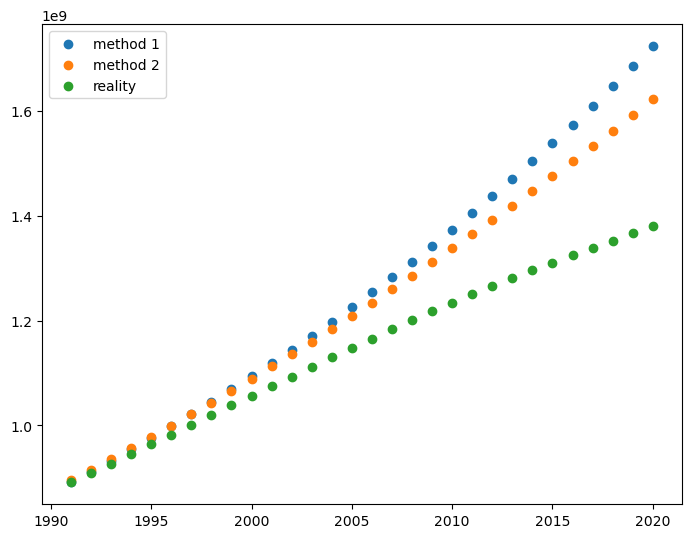

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.scatter(new_years, pop_predict_1, label = "method 1")
ax.scatter(new_years, pop_predict_2, label = "method 2")
ax.scatter(new_years, pop_2020, label = "reality")
plt.legend()
plt.show(block=False)

Both extrapolations are a lot more ambitious with their predictions compared to reality.  Interestingly, the NumPy methodology is closer to reality than the traditional method of using a population growth equation!

Hope you enjoyed this notebook, and it offered a glimpse into what NumPy can do to hopefully make your life a bit easier when it comes to maths :)